# RoadSense Project: Traffic Analysis and Prediction Using GPS Data

## Project Overview
This project aims to analyze and predict road traffic conditions using real GPS and vehicle sensor data. Simulated data structured similarly to the Comma2k19 dataset is utilized to train machine learning models for forecasting speed, acceleration, and steering angle throughout the route.

## Project Objectives
- Data cleaning and preparation  
- Exploratory data analysis to understand traffic patterns  
- Building predictive models for traffic conditions  
- Visualizing results and predictions  
- Providing solutions to improve road traffic management  

## Project Structure
- Data file: `comma2k19_simulated.csv`  
- Data cleaning and analysis scripts  
- Predictive modeling code  
- Results visualization  


#  Import Data

Load the simulated traffic data CSV using pandas and preview the first few rows.

In [1]:
import pandas as pd
df = pd.read_csv('comma2k19_simulated.csv')
df.head()

,timestamp,latitude,longitude,speed,acceleration,steering_angle
0,2025-08-01 08:00:00,35.689550,51.389140,53.248217,5.306596,-9.539038
1,2025-08-01 08:00:01,35.689536,51.389232,58.554813,-0.586208,-4.301925
2,2025-08-01 08:00:02,35.689601,51.389238,52.075801,-0.817214,-2.068028
3,2025-08-01 08:00:03,35.689753,51.389174,56.920385,-5.505974,9.438438
4,2025-08-01 08:00:04,35.689730,51.389243,41.063853,2.606276,2.782766


# 📊 Data Overview
We begin by exploring the basic structure of the dataset:

Dimensions and column names Data types Summary statistics Missing values

In [2]:
print(f"Shape of dataset: {df.shape}")
print(f"Column names: {df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")
print(f"\nSummary statistics:\n{df.describe()}")
print(f"\nMissing data:\n{df.isnull().sum()}")


Shape of dataset: (1000, 6)
Column names: ['timestamp', 'latitude', 'longitude', 'speed', 'acceleration', 'steering_angle']

Data types:
timestamp          object
latitude          float64
longitude         float64
speed             float64
acceleration      float64
steering_angle    float64
dtype: object

Summary statistics:
          latitude    longitude        speed  acceleration  steering_angle
count  1000.000000  1000.000000  1000.000000   1000.000000     1000.000000
mean     35.689465    51.393346    60.058342      0.005405       -0.093596
std       0.000956     0.001874     9.834543      7.022731        5.135663
min      35.687833    51.389140    29.804878    -21.900854      -14.647243
25%      35.688733    51.391802    53.520004     -4.724492       -3.687102
50%      35.689256    51.393562    59.997492     -0.142227        0.000923
75%      35.689936    51.395099    66.609153      4.714029        3.334727
max      35.692259    51.396617    99.262377     24.874745       16.2154

# Data Cleaning

Handle missing values, correct data types if needed, and remove any irrelevant or duplicated rows.

In [3]:
# Check for duplicated rows
num_duplicates = df.duplicated().sum()
print(f"\n Number of duplicated rows: {num_duplicates}")

# Optional: Drop duplicates if any
if num_duplicates > 0:
    df = df.drop_duplicates()
    print(" Duplicated rows removed.")
else:
    print(" No duplicated rows found.")

df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
print(f"nat timestamp: {df['timestamp'].isna().sum()}")


 Number of duplicated rows: 0
 No duplicated rows found.
nat timestamp: 0


# Exploratory Data Analysis (EDA)

Perform initial data exploration to understand traffic patterns:

- Visualize speed, acceleration, and steering angle distributions  
- Plot time series for key variables to see trends and anomalies  
- Identify correlations between variables  
- Detect potential outliers or unusual behavior

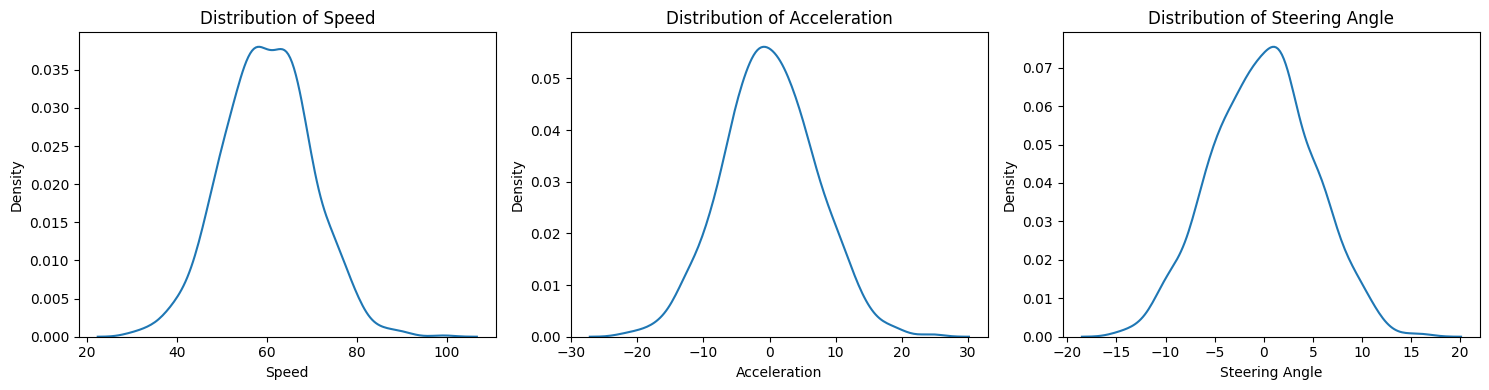

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))

# Speed KDE
plt.subplot(1, 3, 1)
sns.kdeplot(x='speed', data=df)
plt.title('Distribution of Speed')
plt.xlabel('Speed')
plt.ylabel('Density')

# Acceleration KDE
plt.subplot(1, 3, 2)
sns.kdeplot(x='acceleration', data=df)
plt.title('Distribution of Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('Density')

# Steering Angle KDE
plt.subplot(1, 3, 3)
sns.kdeplot(x='steering_angle', data=df)
plt.title('Distribution of Steering Angle')
plt.xlabel('Steering Angle')
plt.ylabel('Density')

plt.tight_layout()
plt.show()
